<a href="https://colab.research.google.com/github/allan-0913/NOMURA_PROJECT/blob/master/bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import datetime
import pandas as pd

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving nomura_global_equity.csv to nomura_global_equity.csv


In [3]:
HData = open("nomura_global_equity.csv").readlines()
Data = [line.strip(",\n").split(";") for line in HData]
for i in range(len(Data)):
     Data[i][1] = float(Data[i][1])
     Data[i][2] = float(Data[i][2])

[j.pop(2) for j in Data]

Data

[['4/1/1997', 12.14],
 ['6/1/1997', 12.13],
 ['7/1/1997', 12.12],
 ['8/1/1997', 12.17],
 ['9/1/1997', 12.2],
 ['10/1/1997', 12.08],
 ['11/1/1997', 11.98],
 ['13/1/1997', 11.97],
 ['14/1/1997', 12.11],
 ['15/1/1997', 12.1],
 ['16/1/1997', 12.03],
 ['17/1/1997', 12.08],
 ['18/1/1997', 12.2],
 ['20/1/1997', 12.21],
 ['21/1/1997', 12.19],
 ['22/1/1997', 12.16],
 ['23/1/1997', 12.25],
 ['24/1/1997', 12.23],
 ['25/1/1997', 12.17],
 ['27/1/1997', 12.18],
 ['28/1/1997', 12.15],
 ['29/1/1997', 12.27],
 ['30/1/1997', 12.27],
 ['31/1/1997', 12.38],
 ['1/2/1997', 12.43],
 ['3/2/1997', 12.44],
 ['11/2/1997', 12.26],
 ['12/2/1997', 12.22],
 ['13/2/1997', 12.27],
 ['14/2/1997', 12.37],
 ['15/2/1997', 12.38],
 ['17/2/1997', 12.38],
 ['18/2/1997', 12.5],
 ['19/2/1997', 12.44],
 ['20/2/1997', 12.48],
 ['21/2/1997', 12.53],
 ['22/2/1997', 12.56],
 ['24/2/1997', 12.55],
 ['25/2/1997', 11.38],
 ['26/2/1997', 11.44],
 ['27/2/1997', 11.38],
 ['28/2/1997', 11.29],
 ['1/3/1997', 11.26],
 ['3/3/1997', 11.26],
 

In [0]:
#10天移動平均
MAarray = []
MA10 = []
MAValue = 0

for i in Data:
    price = float(i[1])
    if len(MAarray) < 10:
        MAarray += [price]                                  
    elif len(MAarray) == 10:                           
        MAarray = MAarray[1:]+[price]             
    MAValue = float(sum(MAarray))/len(MAarray)
    MA10.append(MAValue)

In [0]:
for i in range(len(Data)):
    Data[i].append(round(MA10[i],2))

In [0]:
Time = [datetime.datetime.strptime(line[0],"%d/%m/%Y") for line in Data]
Time1 = [mdates.date2num(line) for line in Time]
Price = [float(line[1]) for line in Data]

In [0]:
dif = []
for i in range(len(Data)):
    dif.append((Data[i][1]-Data[i][2])/Data[i][2])
    Data[i].append(round((Data[i][1]-Data[i][2])/Data[i][2],4))

In [8]:
Data

[['4/1/1997', 12.14, 12.14, 0.0],
 ['6/1/1997', 12.13, 12.14, -0.0008],
 ['7/1/1997', 12.12, 12.13, -0.0008],
 ['8/1/1997', 12.17, 12.14, 0.0025],
 ['9/1/1997', 12.2, 12.15, 0.0041],
 ['10/1/1997', 12.08, 12.14, -0.0049],
 ['11/1/1997', 11.98, 12.12, -0.0116],
 ['13/1/1997', 11.97, 12.1, -0.0107],
 ['14/1/1997', 12.11, 12.1, 0.0008],
 ['15/1/1997', 12.1, 12.1, 0.0],
 ['16/1/1997', 12.03, 12.09, -0.005],
 ['17/1/1997', 12.08, 12.08, 0.0],
 ['18/1/1997', 12.2, 12.09, 0.0091],
 ['20/1/1997', 12.21, 12.1, 0.0091],
 ['21/1/1997', 12.19, 12.09, 0.0083],
 ['22/1/1997', 12.16, 12.1, 0.005],
 ['23/1/1997', 12.25, 12.13, 0.0099],
 ['24/1/1997', 12.23, 12.16, 0.0058],
 ['25/1/1997', 12.17, 12.16, 0.0008],
 ['27/1/1997', 12.18, 12.17, 0.0008],
 ['28/1/1997', 12.15, 12.18, -0.0025],
 ['29/1/1997', 12.27, 12.2, 0.0057],
 ['30/1/1997', 12.27, 12.21, 0.0049],
 ['31/1/1997', 12.38, 12.22, 0.0131],
 ['1/2/1997', 12.43, 12.25, 0.0147],
 ['3/2/1997', 12.44, 12.28, 0.013],
 ['11/2/1997', 12.26, 12.28, -0.0

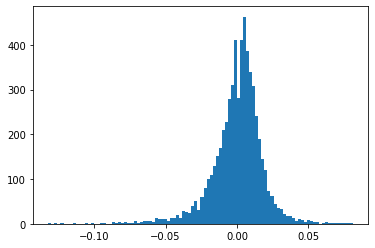

In [9]:
#乖離率分配呈近常態分配
qq = []
for i in range(len(Data)):
    qq.append(Data[i][3])
plt.hist(qq,bins=100)
plt.show()

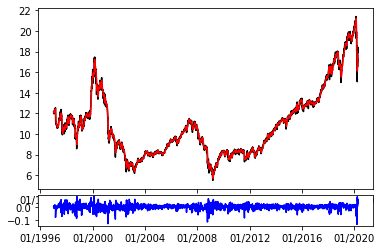

In [10]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot_date(Time1, Price, "k-")
ax1.plot_date(Time1, MA10, "r-")
ax2.plot_date(Time1, dif, "b-")

hfmt = mdates.DateFormatter("%m/%Y")
ax1.xaxis.set_major_formatter(hfmt)

plt.show()

In [0]:
for i in range(len(Data)):
  if Data[i][3]>= 0.05:
    Data[i].append(-1)
  elif Data[i][3]<= -0.05:
    Data[i].append(1)
  else:
    Data[i].append(0)

In [12]:
Data

[['4/1/1997', 12.14, 12.14, 0.0, 0],
 ['6/1/1997', 12.13, 12.14, -0.0008, 0],
 ['7/1/1997', 12.12, 12.13, -0.0008, 0],
 ['8/1/1997', 12.17, 12.14, 0.0025, 0],
 ['9/1/1997', 12.2, 12.15, 0.0041, 0],
 ['10/1/1997', 12.08, 12.14, -0.0049, 0],
 ['11/1/1997', 11.98, 12.12, -0.0116, 0],
 ['13/1/1997', 11.97, 12.1, -0.0107, 0],
 ['14/1/1997', 12.11, 12.1, 0.0008, 0],
 ['15/1/1997', 12.1, 12.1, 0.0, 0],
 ['16/1/1997', 12.03, 12.09, -0.005, 0],
 ['17/1/1997', 12.08, 12.08, 0.0, 0],
 ['18/1/1997', 12.2, 12.09, 0.0091, 0],
 ['20/1/1997', 12.21, 12.1, 0.0091, 0],
 ['21/1/1997', 12.19, 12.09, 0.0083, 0],
 ['22/1/1997', 12.16, 12.1, 0.005, 0],
 ['23/1/1997', 12.25, 12.13, 0.0099, 0],
 ['24/1/1997', 12.23, 12.16, 0.0058, 0],
 ['25/1/1997', 12.17, 12.16, 0.0008, 0],
 ['27/1/1997', 12.18, 12.17, 0.0008, 0],
 ['28/1/1997', 12.15, 12.18, -0.0025, 0],
 ['29/1/1997', 12.27, 12.2, 0.0057, 0],
 ['30/1/1997', 12.27, 12.21, 0.0049, 0],
 ['31/1/1997', 12.38, 12.22, 0.0131, 0],
 ['1/2/1997', 12.43, 12.25, 0.0147

In [13]:
dt = []
for i in range(len(Data)):
    dt.append(Data[i][0])

for i in dt:
    df = [line.split("/") for line in dt]

for i in range(len(df)):
    df[i][0] = int(df[i][0])
    df[i][1] = int(df[i][1])
    df[i][2] = int(df[i][2])

for i in range(len(df)):
  df[i].append(Data[i][1])
  df[i].append(Data[i][2])
  df[i].append(Data[i][3])
  df[i].append(Data[i][4])

df

[[4, 1, 1997, 12.14, 12.14, 0.0, 0],
 [6, 1, 1997, 12.13, 12.14, -0.0008, 0],
 [7, 1, 1997, 12.12, 12.13, -0.0008, 0],
 [8, 1, 1997, 12.17, 12.14, 0.0025, 0],
 [9, 1, 1997, 12.2, 12.15, 0.0041, 0],
 [10, 1, 1997, 12.08, 12.14, -0.0049, 0],
 [11, 1, 1997, 11.98, 12.12, -0.0116, 0],
 [13, 1, 1997, 11.97, 12.1, -0.0107, 0],
 [14, 1, 1997, 12.11, 12.1, 0.0008, 0],
 [15, 1, 1997, 12.1, 12.1, 0.0, 0],
 [16, 1, 1997, 12.03, 12.09, -0.005, 0],
 [17, 1, 1997, 12.08, 12.08, 0.0, 0],
 [18, 1, 1997, 12.2, 12.09, 0.0091, 0],
 [20, 1, 1997, 12.21, 12.1, 0.0091, 0],
 [21, 1, 1997, 12.19, 12.09, 0.0083, 0],
 [22, 1, 1997, 12.16, 12.1, 0.005, 0],
 [23, 1, 1997, 12.25, 12.13, 0.0099, 0],
 [24, 1, 1997, 12.23, 12.16, 0.0058, 0],
 [25, 1, 1997, 12.17, 12.16, 0.0008, 0],
 [27, 1, 1997, 12.18, 12.17, 0.0008, 0],
 [28, 1, 1997, 12.15, 12.18, -0.0025, 0],
 [29, 1, 1997, 12.27, 12.2, 0.0057, 0],
 [30, 1, 1997, 12.27, 12.21, 0.0049, 0],
 [31, 1, 1997, 12.38, 12.22, 0.0131, 0],
 [1, 2, 1997, 12.43, 12.25, 0.0147

In [0]:
df = pd.DataFrame(df,columns = ["Day","Month","Year","Price","MA10","bias","add_state"])

In [15]:
df

,Day,Month,Year,Price,MA10,bias,add_state
0,4,1,1997,12.14,12.14,0.0000,0
1,6,1,1997,12.13,12.14,-0.0008,0
2,7,1,1997,12.12,12.13,-0.0008,0
3,8,1,1997,12.17,12.14,0.0025,0
4,9,1,1997,12.20,12.15,0.0041,0
...,...,...,...,...,...,...,...
5872,8,4,2020,17.83,17.09,0.0433,0
5873,9,4,2020,17.99,17.26,0.0423,0
5874,13,4,2020,17.92,17.40,0.0299,0
5875,14,4,2020,18.42,17.49,0.0532,-1


In [0]:
nian = []
yue = []
ri = []
invest_d = []

for i in range(1997, 2019+1):
  nian = df.loc[df['Year'] == i]
  for j in range(1, 12+1):
    yue = nian.loc[nian['Month'] == j] 
    ri = yue.values.tolist()
    invest_d.append(ri[0])
    ri = []
    yue = []

In [18]:
for i in range(len(invest_d)):
  invest_d[i][0] = int(invest_d[i][0])
  invest_d[i][1] = int(invest_d[i][1])
  invest_d[i][2] = int(invest_d[i][2])
  invest_d[i][6] = int(invest_d[i][6])

invest_d

[[4, 1, 1997, 12.14, 12.14, 0.0, 0],
 [1, 2, 1997, 12.43, 12.25, 0.0147, 0],
 [1, 3, 1997, 11.26, 11.93, -0.0562, 1],
 [1, 4, 1997, 10.87, 10.89, -0.0018, 0],
 [2, 5, 1997, 10.68, 10.69, -0.0009, 0],
 [2, 6, 1997, 11.32, 11.3, 0.0018, 0],
 [2, 7, 1997, 11.67, 11.48, 0.0166, 0],
 [1, 8, 1997, 12.12, 11.83, 0.0245, 0],
 [1, 9, 1997, 10.05, 10.45, -0.0383, 0],
 [1, 10, 1997, 10.27, 10.18, 0.0088, 0],
 [3, 11, 1997, 10.49, 10.56, -0.0066, 0],
 [1, 12, 1997, 10.76, 10.86, -0.0092, 0],
 [3, 1, 1998, 10.94, 10.65, 0.0272, 0],
 [2, 2, 1998, 11.54, 11.4, 0.0123, 0],
 [2, 3, 1998, 11.07, 11.1, -0.0027, 0],
 [1, 4, 1998, 11.63, 11.54, 0.0078, 0],
 [2, 5, 1998, 11.74, 11.79, -0.0042, 0],
 [1, 6, 1998, 11.72, 11.69, 0.0026, 0],
 [2, 7, 1998, 11.1, 11.12, -0.0018, 0],
 [1, 8, 1998, 10.99, 11.11, -0.0108, 0],
 [1, 9, 1998, 9.6, 10.31, -0.0689, 1],
 [1, 10, 1998, 9.61, 9.89, -0.0283, 0],
 [2, 11, 1998, 10.38, 10.13, 0.0247, 0],
 [1, 12, 1998, 10.97, 10.97, 0.0, 0],
 [5, 1, 1999, 11.14, 10.86, 0.0258, 

In [33]:
#overall accumulated performance with fixed invest
fin = 0
son = 0
mother= 0

for i in range(len(invest_d)):
  son += df['Price'][5876]
  mother += invest_d[i][3]
fin = son/mother

fin

1.6870017949693707

In [45]:
#overall accumulated performance with fixed invest + adding
finn = 0
for i in range(len(df)):
  if df['add_state'][i] == 1:
    son += df['Price'][5876]
    mother += df['Price'][i]

finn = son/mother
finn

2.3407016120664172